# Finding a Learning Rate with Tensorflow 2

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()
x_train, x_valid = x_train / 255.0, x_valid / 255.0

x_train = x_train[..., tf.newaxis]
x_valid = x_valid[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(32)

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

def build_model():
    return tf.keras.models.Sequential([
        Conv2D(32, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(10, activation='softmax')
    ])

In [4]:
#載入 lr_finder.py 檔
from lr_finder import LRFinder

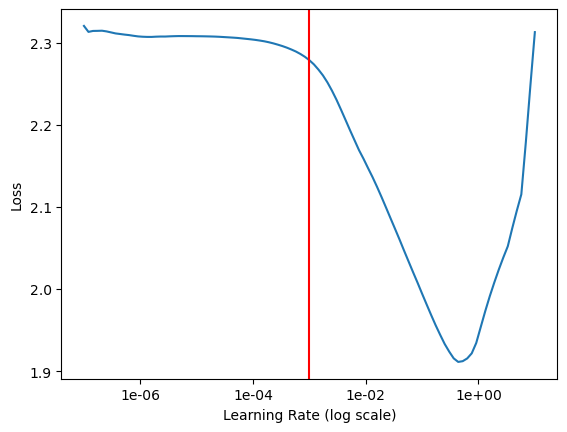

In [5]:
lr_finder = LRFinder()
model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
_ = model.fit(train_ds, epochs=5, callbacks=[lr_finder], verbose=False)
lr_finder.plot()

import matplotlib.pyplot as plt
plt.axvline(1e-3, c='r')

In [6]:
model.evaluate(valid_ds, verbose=False)

8.276265144348145

# 採用使最佳學習率

In [7]:
# lr should be chosen in a region where the loss is rapidly, but strictly decreasing. 
model = build_model() # reinitialize model
adam = tf.optimizers.Adam(1e-3)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
_ = model.fit(train_ds, validation_data=valid_ds, epochs=5, verbose=True)

Epoch 1/5


1875/1875 [==============================] - 30s 15ms/step - loss: 0.3968 - accuracy: 0.8577 - val_loss: 0.3135 - val_accuracy: 0.8832
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2701 - accuracy: 0.9012 - val_loss: 0.2780 - val_accuracy: 0.9000
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2290 - accuracy: 0.9148 - val_loss: 0.2515 - val_accuracy: 0.9090
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1999 - accuracy: 0.9252 - val_loss: 0.2856 - val_accuracy: 0.8920
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1749 - accuracy: 0.9344 - val_loss: 0.2512 - val_accuracy: 0.9151


In [9]:
#test_data
model.evaluate(valid_ds, verbose=False)

[0.2512146830558777, 0.9150999784469604]